In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.cluster import KMeans

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# 1

In [3]:
data=pd.read_excel('data/sales.xlsx')

In [4]:
data['년']=data['일자'].apply(lambda x: x.split('-')[0])
data['월']=data['일자'].apply(lambda x: x.split('-')[1])
data.head()

,계정번호,고객,상품,주문수량,단가,주문액,일자,년,월
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01,2014,01
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01,2014,01
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01,2014,01
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01,2014,01
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01,2014,01


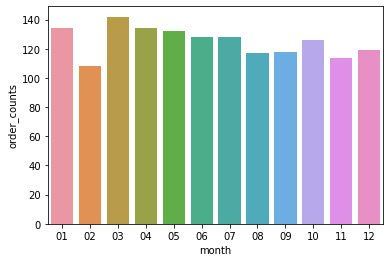

In [5]:
# 1-1
pivot_cnt=pd.pivot_table(data=data,index='월',values='고객',aggfunc='count').reset_index()
pivot_cnt.columns=['월','주문횟수']

sns.barplot(x=pivot_cnt['월'],y=pivot_cnt['주문횟수'])
plt.xlabel('month')
plt.ylabel('order_counts')
plt.show()

In [6]:
data.head()

,계정번호,고객,상품,주문수량,단가,주문액,일자,년,월
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01,2014,01
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01,2014,01
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01,2014,01
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01,2014,01
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01,2014,01


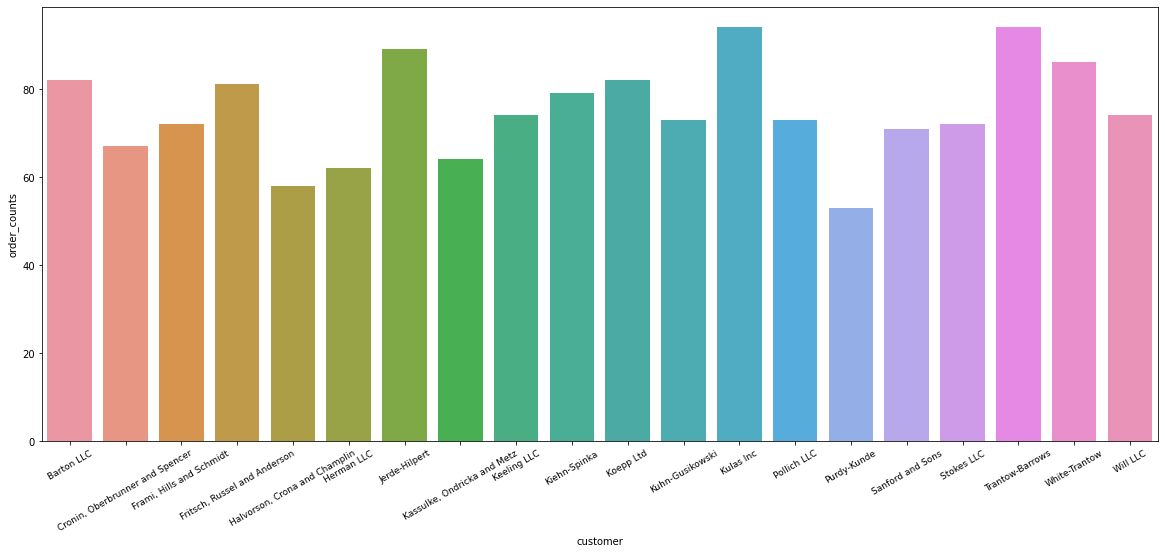

In [7]:
# 1-2
pivot_cnt=pd.pivot_table(data=data,index='고객',values='월',aggfunc='count').reset_index()
pivot_cnt.columns=['고객','주문횟수']

plt.figure(figsize=[20,8])
sns.barplot(x=pivot_cnt['고객'],y=pivot_cnt['주문횟수'])
plt.xlabel('customer')
plt.ylabel('order_counts')
plt.xticks(rotation=30,fontsize=9)
plt.show()

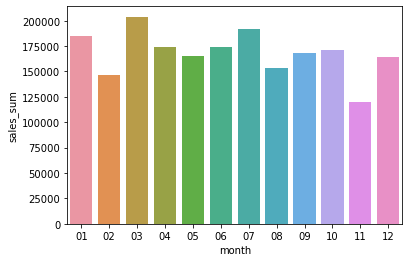

In [8]:
# 1-3
pivot_cnt=pd.pivot_table(data=data,index='월',values='주문액',aggfunc='sum').reset_index()
pivot_cnt.columns=['월','주문액합계']

sns.barplot(x=pivot_cnt['월'],y=pivot_cnt['주문액합계'])
plt.xlabel('month')
plt.ylabel('sales_sum')
plt.show()

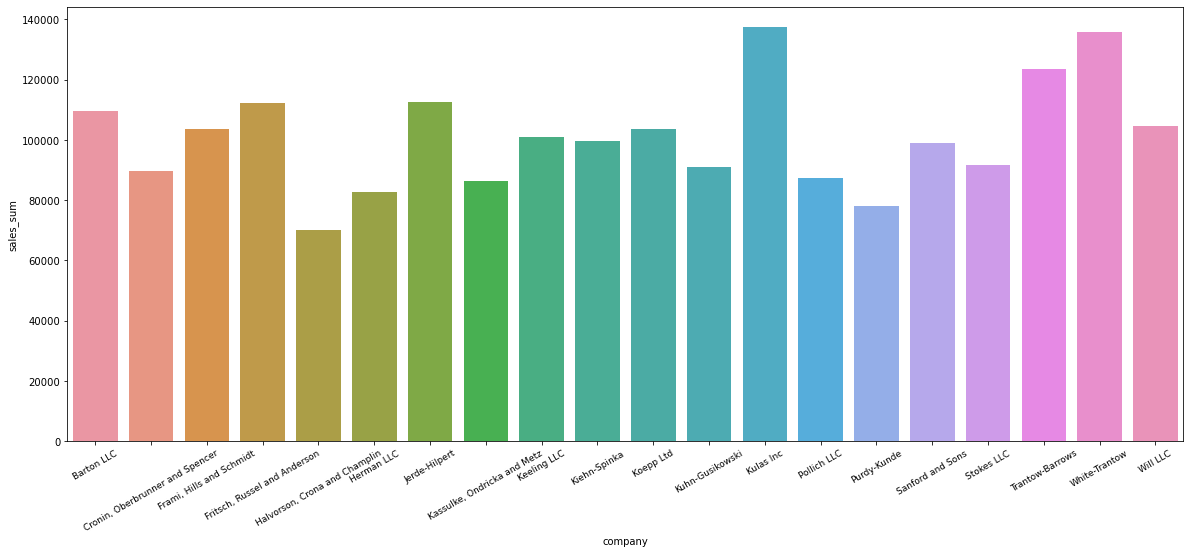

In [9]:
# 1-4
pivot_cnt=pd.pivot_table(data=data,index='고객',values='주문액',aggfunc='sum').reset_index()
pivot_cnt.columns=['거래기업','주문액합계']

plt.figure(figsize=[20,8])
sns.barplot(x=pivot_cnt['거래기업'],y=pivot_cnt['주문액합계'])
plt.xlabel('company')
plt.ylabel('sales_sum')
plt.xticks(rotation=30,fontsize=9)
plt.show()

In [10]:
# 1-5
pivot_cnt=pd.pivot_table(data=data,index=['월','고객'],values='주문액',aggfunc='sum').reset_index()
top_3=pd.DataFrame(pivot_cnt.sort_values(['월','주문액'],ascending=[True,False]).groupby('월')['주문액'].nlargest(n=3)).reset_index()

for i in range(len(top_3)):
    top_3['level_1'][i]=pivot_cnt.iloc[top_3['level_1'][i],1] 

top_3

,월,level_1,주문액
0,01,Will LLC,20953.87
1,01,Kulas Inc,15398.87
2,01,"Fritsch, Russel and Anderson",15130.77
3,02,"Cronin, Oberbrunner and Spencer",13976.26
4,02,Kulas Inc,13973.65
5,02,Will LLC,13613.06
6,03,Kulas Inc,24134.84
7,03,Keeling LLC,17110.10
8,03,Kuhn-Gusikowski,15896.09
9,04,White-Trantow,19009.20


# 2

In [11]:
data=pd.read_excel('data/clients.xlsx')
data.head()

,Customer_Id,Age,Education,Years_Employed,Income,Card_Debt,Other_Debt,DebtIncomeRatio
0,1,41,2,6,1.9,0.124,1.073,6.3
1,2,47,1,26,10.0,4.582,8.218,12.8
2,3,33,2,10,5.7,6.111,5.802,20.9
3,4,29,2,4,1.9,0.681,0.516,6.3
4,5,47,1,31,25.3,9.308,8.908,7.2


In [12]:
# 2-1
kmeans = KMeans(n_clusters=4)
kmeans.fit(data.drop('Customer_Id',axis=1))

data['cluster']=kmeans.labels_
data.head()

,Customer_Id,Age,Education,Years_Employed,Income,Card_Debt,Other_Debt,DebtIncomeRatio,cluster
0,1,41,2,6,1.9,0.124,1.073,6.3,3
1,2,47,1,26,10.0,4.582,8.218,12.8,1
2,3,33,2,10,5.7,6.111,5.802,20.9,2
3,4,29,2,4,1.9,0.681,0.516,6.3,0
4,5,47,1,31,25.3,9.308,8.908,7.2,1


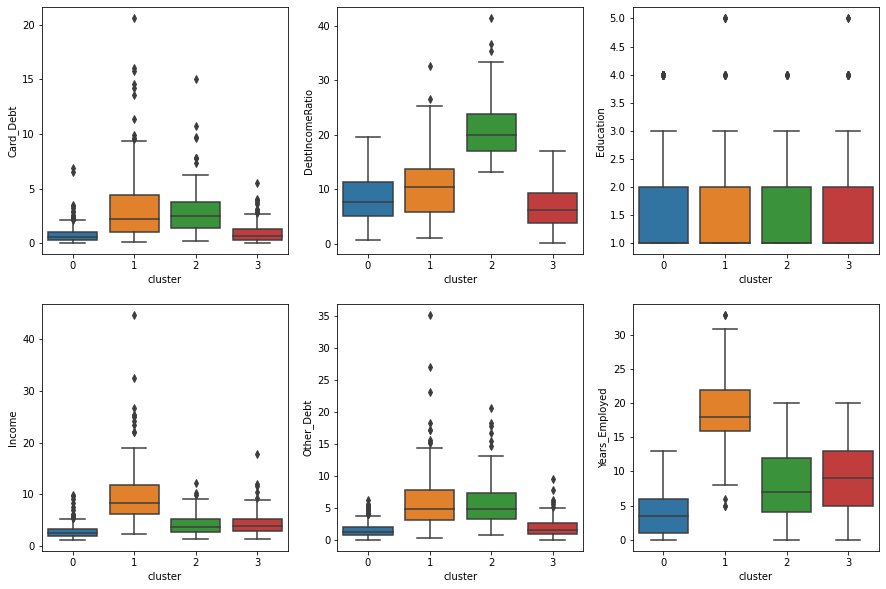

In [13]:
# 2-2
feature=['Card_Debt', 'DebtIncomeRatio', 'Education', 'Income', 'Other_Debt', 'Years_Employed']

plt.figure(figsize=[15,10])
for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=data,x='cluster', y=feature[i])
plt.show()

# 3

In [14]:
data=pd.read_excel('data/marketing.xlsx')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,0,0


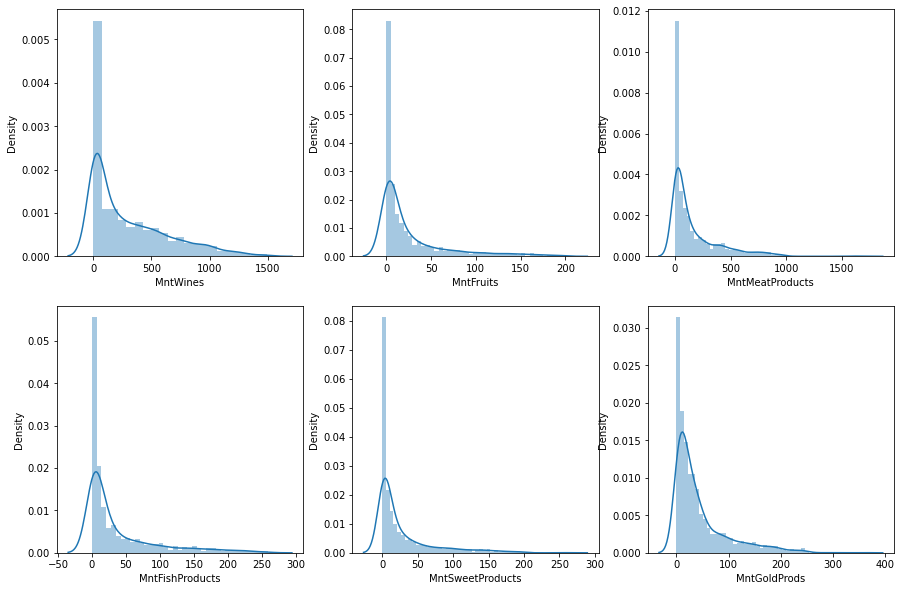

In [15]:
# 3-1
features=['MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

plt.figure(figsize=[15,10])
for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.distplot(x=data[features[i]])
    plt.xlabel(features[i])
plt.show()

In [16]:
#3-2
data=data.dropna().reset_index(drop=True)

# 범주형 변수들은 label encoding해서 매핑
encoding_subject=['Education','Marital_Status']

for i in encoding_subject:
    lb=LabelEncoder()
    lb.fit(data[i])
    data[i]=lb.transform(data[i])


X_features=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response']
       
y = data['MntWines']
x = data[X_features]
model = sm.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               MntWines   R-squared (uncentered):                   0.804
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              473.2
Date:                Tue, 21 Jun 2022   Prob (F-statistic):                        0.00
Time:                        17:34:37   Log-Likelihood:                         -14902.
No. Observations:                2216   AIC:                                  2.984e+04
Df Residuals:                    2197   BIC:                                  2.995e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year_Birth             -0.1831      0.015    -12.150      0.000      -0.213      -0.154
Education              31.9773      4.053      7.889      0.000      24.029      39.926
Marital_Status         -0.0600      3.992     -0.015      0.988      -7.889       7.769
Income                  0.0022      0.000      8.874      0.000       0.002       0.003
Kidhome               -49.0221     10.812     -4.534      0.000     -70.224     -27.820
Teenhome                6.3911      9.559      0.669      0.504     -12.355      25.137
Recency                 0.3914      0.153      2.566      0.010       0.092       0.691
MntFruits              -0.2687      0.151     -1.784      0.075      -0.564       0.027
MntMeatProducts         0.1979      0.033      5.998      0.000       0.133       0.263
MntFishProducts        -0.1746      0.114     -1.531      0.126      -0.398       0.049
MntSweetProducts       -0.2494      0.145     -1.719      0.086      -0.534       0.035
MntGoldProds            0.2014      0.102      1.981      0.048       0.002       0.401
NumDealsPurchases     -13.8863      2.847     -4.877      0.000     -19.470      -8.303
NumWebPurchases        21.6068      2.153     10.036      0.000      17.385      25.829
NumCatalogPurchases    28.8487      2.479     11.636      0.000      23.987      33.710
NumStorePurchases      33.0217      1.922     17.177      0.000      29.252      36.792
NumWebVisitsMonth      21.3564      2.663      8.019      0.000      16.134      26.579
Complain              -47.6589     44.517     -1.071      0.284    -134.958      39.641
Response               93.8055     13.207      7.103      0.000      67.905     119.706
==============================================================================
Omnibus:                      407.958   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2840.719
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       8.377   Cond. No.                     6.01e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3-3

+ Year_Birth, Education, Income, Kidhome, Recency, MntMeatProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth,Response 변수들이 p-value가 0.05보다 작으므로 유의수준 5%하에서 유의하다고 할 수 있음
+ 위 변수들중 Year_Birth, Kidhome, NumDealsPurchases는 계수가 음의 상수로써 종속변수와 음의 관계를 띄고있음. 즉 증가할수록 와인 구매액은 낮아지는 분포를 보임. 특히 Kidhome이 가장 큰 영향을 미침.
+ 그외의 변수들은 모두 양의 관계로써 작용하는데, 이중 NumStorePurchases와 Education에 해당하는 교육수준에 따른 변수가 매우 크게 영향을 미침.
+ 각 계수들은 종속변수가 1증가할때 각 변수들의 계수 만큼 증가한다고 해석함.

In [17]:
# 3-4
X_features=['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntFruits', 'MntWines','NumDealsPurchases',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain']

y = data['Response']
x = data[X_features]
model = sm.Logit(y, x)
result = model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.327462
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 2216
Model:                          Logit   Df Residuals:                     2197
Method:                           MLE   Df Model:                           18
Date:                Tue, 21 Jun 2022   Pseudo R-squ.:                  0.2262
Time:                        17:34:37   Log-Likelihood:                -725.65
converged:                       True   LL-Null:                       -937.76
Covariance Type:            nonrobust   LLR p-value:                 8.053e-79
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year_Birth             -0.0015      0.000     -6.118      0.000      -0.002      -0.001
Education               0.2506      0.067      3.751      0.000       0.120       0.382
Marital_Status         -0.0488      0.063     -0.780      0.436      -0.172       0.074
Income               1.536e-06   3.04e-06      0.504      0.614   -4.43e-06     7.5e-06
Kidhome                 0.1787      0.182      0.980      0.327      -0.179       0.536
Teenhome               -1.0562      0.171     -6.191      0.000      -1.391      -0.722
Recency                -0.0256      0.003     -9.993      0.000      -0.031      -0.021
MntFruits               0.0001      0.002      0.061      0.951      -0.004       0.004
MntWines                0.0016      0.000      5.862      0.000       0.001       0.002
NumDealsPurchases       0.0412      0.042      0.985      0.325      -0.041       0.123
MntMeatProducts         0.0017      0.000      3.925      0.000       0.001       0.003
MntFishProducts        -0.0014      0.002     -0.900      0.368      -0.004       0.002
MntSweetProducts        0.0025      0.002      1.274      0.203      -0.001       0.006
MntGoldProds            0.0041      0.001      2.991      0.003       0.001       0.007
NumWebPurchases         0.0786      0.029      2.709      0.007       0.022       0.135
NumCatalogPurchases     0.1047      0.035      2.985      0.003       0.036       0.173
NumStorePurchases      -0.1681      0.029     -5.705      0.000      -0.226      -0.110
NumWebVisitsMonth       0.2060      0.039      5.227      0.000       0.129       0.283
Complain                0.5013      0.712      0.705      0.481      -0.893       1.896
=======================================================================================
"""

3-5
+ Year_Birth, Education, Teenhome, Recency, MntWines, MntMeatProducts, MntGoldProds, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth 변수들이 p-value가 0.05보다 작으므로 유의수준 5%하에서 유의하다고 할 수 있음
+ 이 중 Year_Birth, Teenhome, Recency, NumStorePurchases 는 음의 계수를 띄고있어 값이 클수록 쿠폰을 사용하지 않는 경향이 큰것으로 해석할 수 있음
+ 반면 이외의 변수들은 값이 클수록 쿠폰을 사용하는것에 영향을 주는 것을 알 수 있음. 특히 Education과 NumWebVisitsMonth은 계수값이 각각 0.2506, 0.2060으로 쿠폰을 사용하는 것에 많은 영향을 미침